# EDA NFI

In [64]:
import pandas as pd
import openpyxl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## 1. Parcelle data

In [2]:
parcelle = pd.read_excel('IFN/data_parcelles_with_gps.xlsx')

In [3]:
display(parcelle.head())
print(parcelle.shape)
parcelle.columns

,Unnamed: 0,PARCELLE,INVNR,LAT,LON,ALT,PRODREG,HT_VEG,DATE,SLOPE25,...,V_LARCH,V_ARVEN,V_UENDH,V_BUCHE,V_AHORN,V_ESCHE,V_EICHE,V_CASTA,V_UELBH,LFI
0,0,51,150,47.781623,8.612822,715.918970,1,3,1984-04-10,58.407726,...,0.0,0.0,0.0,184.359112,0.0,0.0,0.0,0.0,0.000000,LFI1
1,2403,51,250,47.781623,8.612822,715.918970,1,3,1994-10-19,58.407726,...,0.0,0.0,0.0,241.199369,0.0,0.0,0.0,0.0,0.000000,LFI2
2,7209,51,450,47.781623,8.612822,715.918970,1,3,2011-11-09,58.407726,...,0.0,0.0,0.0,347.025988,0.0,0.0,0.0,0.0,0.000000,LFI4
3,4806,51,350,47.781623,8.612822,715.918970,1,3,2005-11-01,58.407726,...,0.0,0.0,0.0,311.861351,0.0,0.0,0.0,0.0,9.259809,LFI3
4,2404,384,250,47.736528,8.625154,563.829759,1,2,1995-07-10,55.683254,...,0.0,0.0,0.0,191.500642,0.0,0.0,0.0,0.0,0.000000,LFI2


(9612, 86)


Index(['Unnamed: 0', 'PARCELLE', 'INVNR', 'LAT', 'LON', 'ALT', 'PRODREG',
       'HT_VEG', 'DATE', 'SLOPE25', 'ASPECT25', 'PERF_CROI', 'QUAL_STATION',
       'UNIT_VEG_FINE', 'UNIT_VEG_GROS', 'REBOISEMENT_AN', 'SURF_TER_HA',
       'AGE_PPL', 'MODE_REGEN', 'TAILLE_PPL', 'INTENSITE_EXPLOIT',
       'TRACES_FEU', 'DEGRAD_PPL', 'DIV_STR_PPL', 'DIV_STR_PPL_CLASS', 'DDOM',
       'DEG_SUR_PER', 'LAST_INTER_DATE', 'TIGES_VIV_H', 'SDI', 'SDI_CLASSE',
       'INT_IFN2_IFN3', 'INT_IFN3-IFN4', 'NIV_DEV', 'MELANGE',
       'NEXT_INTER_DATE', 'NEXT_INTER_TYPE', 'RELIEF', 'DEG_FERMETURE',
       'STR_PPL', 'TYPE_FORET305', 'SURCHARGE', 'TYP_RAJ_PPL', 'TAUX_COUV_RAJ',
       'TAUX_COUV_RAJ_FIN', 'TAUX_COUV_RAJ_ASS', 'ESPECE_DOM', 'FEU_RES',
       'TYPE_FORET', 'EPIC_PER', 'SAPIN_PER', 'PIN_PER', 'MELEZ_PER',
       'ARO_PER', 'OTHER_CONIF_PER', 'HETR_PER', 'ERAB_PER', 'FREN_PER',
       'CHEN_PER', 'DGANTCA', 'OTHER_FEUILL_PER', 'CONIF_PER_STD',
       'ARBUST_PER', 'FEUILL_PER', 'CONIF_PER', 'PROC

In [4]:
print("Basics statistics: ")
display(parcelle.describe(include='all'))

print("Percentage of missing values: ")
display(100*parcelle.isnull().sum()/parcelle.shape[0])


Basics statistics: 


C:\Users\noyer\AppData\Local\Temp\ipykernel_39828\1686401587.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(parcelle.describe(include='all'))


,Unnamed: 0,PARCELLE,INVNR,LAT,LON,ALT,PRODREG,HT_VEG,DATE,SLOPE25,...,V_LARCH,V_ARVEN,V_UENDH,V_BUCHE,V_AHORN,V_ESCHE,V_EICHE,V_CASTA,V_UELBH,LFI
count,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000,9612,9612.000000,...,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9612
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2349,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995-06-20 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LFI1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2403
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983-03-15 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-03 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4805.500000,98928.478568,300.000000,46.647129,8.373582,1239.465745,3.672077,3.835622,NaN,59.484392,...,28.301673,2.536589,0.400941,54.702979,9.177937,8.636591,2.782231,7.901297,11.157875,NaN
std,2774.889728,46104.772059,111.809215,0.402619,0.954026,412.388186,1.099672,1.154413,NaN,22.805324,...,81.413670,18.299404,6.737838,120.521178,28.438937,35.339167,17.151467,42.815613,32.191319,NaN
min,0.000000,51.000000,150.000000,45.860080,6.241239,331.652193,1.000000,2.000000,NaN,0.559998,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2402.750000,59317.000000,225.000000,46.294223,7.490960,920.655711,3.000000,3.000000,NaN,43.593285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


Percentage of missing values: 


Unnamed: 0    0.000000
PARCELLE      0.000000
INVNR         0.000000
LAT           0.000000
LON           0.000000
                ...   
V_ESCHE       1.695797
V_EICHE       1.695797
V_CASTA       1.695797
V_UELBH       1.695797
LFI           0.000000
Length: 86, dtype: float64

In [46]:
display(parcelle.loc[(parcelle["SURF_TER_HA"] == parcelle.loc[parcelle["LFI"] == "LFI4", "SURF_TER_HA"].max()), :])
display(parcelle.loc[(parcelle["SURF_TER_HA"] == 10) & (parcelle["LFI"] == "LFI4"),:])

,Unnamed: 0,PARCELLE,INVNR,LAT,LON,ALT,PRODREG,HT_VEG,DATE,SLOPE25,...,V_UENDH,V_BUCHE,V_AHORN,V_ESCHE,V_EICHE,V_CASTA,V_UELBH,LFI,DEG_FERMETURE_pos,TAUX_COUV_RAJ_ASS_pos
2794,7907,65333,450,46.878364,10.338465,2019.717927,4,6,2015-09-15,44.008183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LFI4,3,1


,Unnamed: 0,PARCELLE,INVNR,LAT,LON,ALT,PRODREG,HT_VEG,DATE,SLOPE25,...,V_UENDH,V_BUCHE,V_AHORN,V_ESCHE,V_EICHE,V_CASTA,V_UELBH,LFI,DEG_FERMETURE_pos,TAUX_COUV_RAJ_ASS_pos
5396,8558,115517,450,46.546278,7.386485,1013.497252,3,2,2013-05-13,46.82774,...,0.0,0.0,0.0,7.31881,0.0,0.0,0.0,LFI4,4,4


In [5]:
parcelle.PROCESS_SILVA.unique()

array([1, 2, 3, 4], dtype=int64)

## 2. Graphs

### 2.1 Forest characteristics

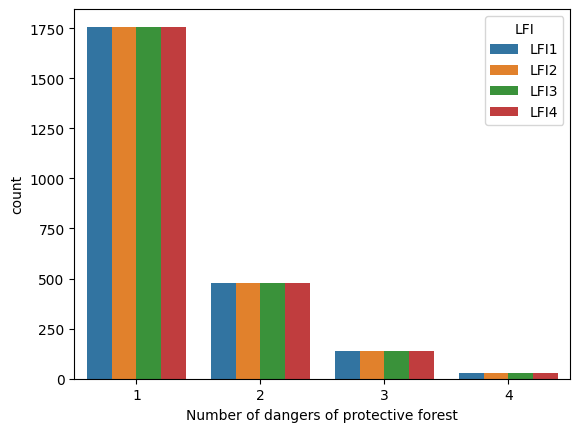

In [6]:
## Code Process_Silva : si la forêt protège contre un ou plusieurs dangers naturels
# -1 pas d'indication
# 0	 pas de danger naturel
# 1	 un danger naturel
# 2	 deux danger naturels
# 3	 trois danger naturels
# 4	 quatre danger naturels

pc = sns.countplot(x="PROCESS_SILVA", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pc.set(xlabel='Number of dangers of protective forest')
plt.show()

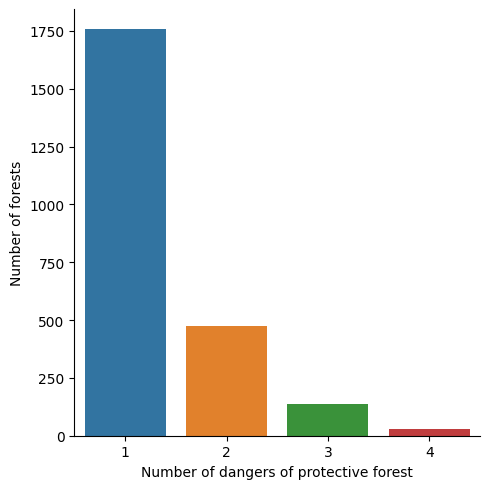

In [18]:
danger = pd.DataFrame(parcelle.groupby("PROCESS_SILVA")["PARCELLE"].nunique().reset_index())
pc = sns.catplot(x="PROCESS_SILVA", y = "PARCELLE", data=danger, kind="bar")
pc.set(xlabel='Number of dangers of protective forest', ylabel="Number of forests")
plt.show()

In [61]:
danger = pd.DataFrame(parcelle.groupby("PROCESS_SILVA")["PARCELLE"].nunique().reset_index())
danger["x"] = danger["PROCESS_SILVA"].apply(lambda x : str(x))

dpf = px.bar(x="x", y = "PARCELLE", data_frame=danger, color="PROCESS_SILVA",
             labels={"PARCELLE":"Number of forests", "x":"Number of dangers managed by the forest"},
             text_auto=True, width=600)
dpf.update_coloraxes(showscale=False)
dpf.show()

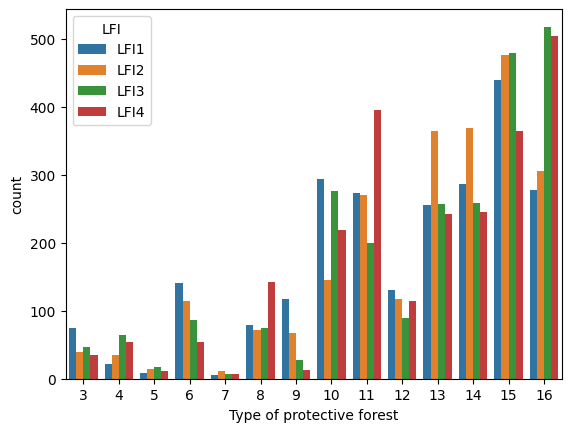

In [7]:
## Type of forest
# -1 Valeur non déterminée
# 1 forêt inaccessible
# 2 forêt buissonnante
# 3 surface forestière non boisée en permanence
# 4 surface forestière temporairement non boisée
# 5 routes et talus
# 6 boisement permanent
# 7 selves et plantations
# 8 Taillis sous futaie
# 9 Taillis sous futaie
# 10 Haute futaie jardinée
# 11 futaie irrégulière
# 12 Jeunes peuplements/épaississement
# 13 perchis
# 14 bois d'œuvre faible
# 15 bois d'œuvre moyen
# 16 bois d'œuvre fort
# 17 relevé incomplet

pt = sns.countplot(x="TYPE_FORET305", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='Type of protective forest')
plt.show()

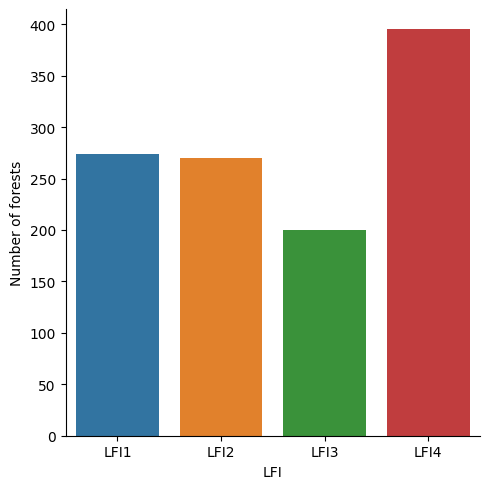

In [30]:
tForest = pd.DataFrame(parcelle.groupby(["TYPE_FORET305", "LFI"])["PARCELLE"].nunique().reset_index())
tForest["year"] = tForest["LFI"].apply(lambda x : str(1983) if x == "LFI1"
                                                            else str(1994) if x == "LFI2"
                                                            else str(2005) if x == "LFI3"
                                                            else str(2013))
pt = sns.catplot(y="PARCELLE", x="LFI", data=tForest.loc[tForest["TYPE_FORET305"] == 11,:], kind="bar")
pt.set(ylabel='Number of forests')
plt.show()

In [74]:
tForest = pd.DataFrame(parcelle.groupby(["TYPE_FORET305", "LFI"])["PARCELLE"].nunique().reset_index())
tForest["year"] = tForest["LFI"].apply(lambda x : str(1983) if x == "LFI1"
                                                            else str(1994) if x == "LFI2"
                                                            else str(2005) if x == "LFI3"
                                                            else str(2013))

tForest["type"] = tForest["TYPE_FORET305"].apply(lambda x : "Valeur non déterminée" if x == -1
                                                                    else "forêt inaccessible" if x == 1
                                                                    else "forêt buissonnante" if x == 2
                                                                    else "surface forestière non boisée en permanence" if x == 3
                                                                    else "surface forestière temporairement non boisée" if x == 4
                                                                    else "routes et talus" if x == 5
                                                                    else "boisement permanent" if x == 6
                                                                    else "selves et plantations" if x == 7
                                                                    else "Taillis sous futaie" if x == 8
                                                                    else "Taillis sous futaie" if x == 9
                                                                    else "Haute futaie jardinée" if  x == 10
                                                                    else "futaie irrégulière" if x == 11
                                                                    else "Jeunes peuplements/épaississement" if x == 12
                                                                    else "perchis" if x == 13
                                                                    else "bois d'œuvre faible" if x == 14
                                                                    else "bois d'œuvre moyen" if x == 15
                                                                    else "bois d'œuvre fort" if x == 16
                                                                    else "relevé incomplet")

tpf = px.bar(x="year", y = "PARCELLE", data_frame=tForest.loc[tForest["type"] == "futaie irrégulière",:], color="year",
             labels={"PARCELLE":"Number of forests", "year":"Year"},
             text_auto=True, width=600)
tpf.update_coloraxes(showscale=False)
tpf.update(layout_showlegend=False)
tpf.show()





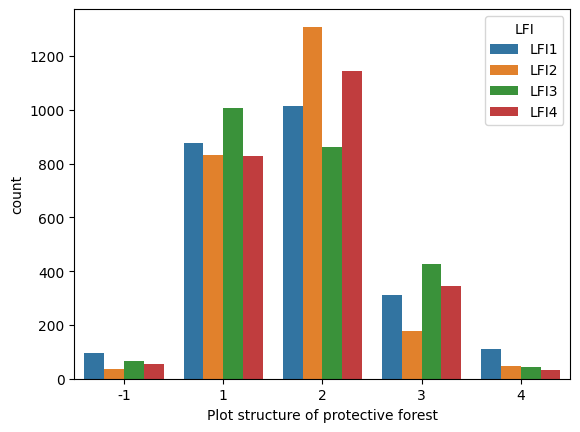

In [8]:
## Structure peuplement
# -1 Valeur non déterminée
# 1 monocouche
# 2 multi-strates régulier.
# 3 étagé
# 4 Structure en rotations

pt = sns.countplot(x="STR_PPL", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='Plot structure of protective forest')
plt.show()

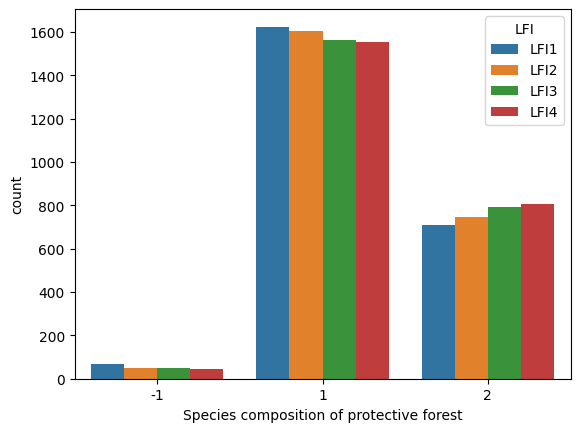

In [9]:
## catégorie espèce
# 1 : résineux
# 2 : feuillus

pt = sns.countplot(x="FEU_RES", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='Species composition of protective forest')
plt.show()

In [94]:
conileaf = pd.DataFrame(parcelle.groupby(["FEU_RES", "LFI"])["PARCELLE"].nunique().reset_index())
conileaf["year"] = conileaf["LFI"].apply(lambda x : str(1983) if x == "LFI1"
                                                              else str(1994) if x == "LFI2"
                                                              else str(2005) if x == "LFI3"
                                                              else str(2013))

# if color argument is not string, grouped bar option does not work
conileaf["species"] = conileaf["FEU_RES"].apply(lambda x : "Coniferous" if x == 1
                                                                        else "Deciduous" if x == 2
                                                                        else "Not determined")

dpf = px.bar(x="year", y = "PARCELLE", data_frame=conileaf, color="species",
             barmode = "group",
             labels={"PARCELLE":"Number of forests", "year":"Year", "species":"Dominant group of species"},
             text_auto=True, width=700)
dpf.update_coloraxes(showscale=False)
dpf.show()

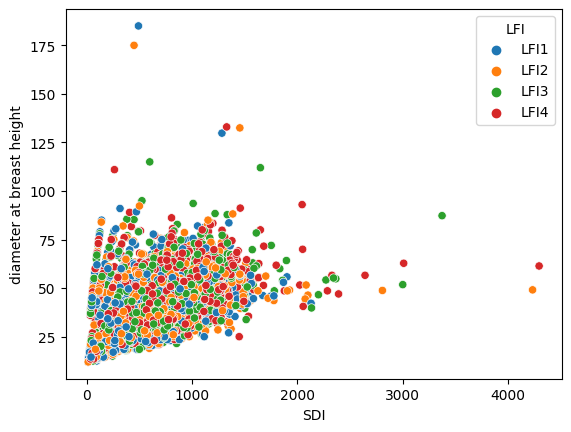

In [10]:
## Stand Density Index
pt = sns.scatterplot(x="SDI", y="DDOM", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='SDI', ylabel="diameter at breast height")
plt.show()

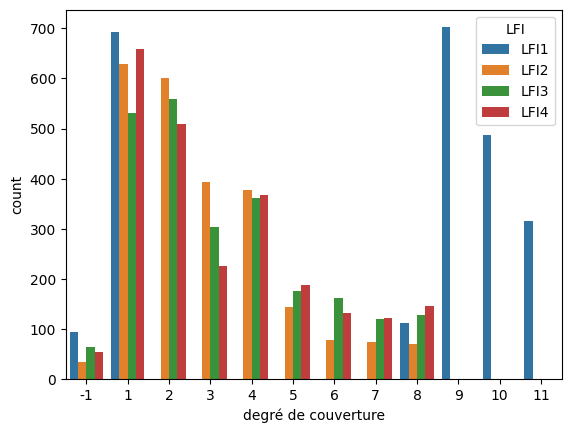

In [11]:
## degré de recouvrement
# -1	pas d'indication
# 1	comprimé
# 2	normal
# 3	lâche
# 4	aéré
# 5	clairièré
# 6	en collectifs serrés
# 7	en collectifs normaux
# 8	fermeture étagée
# 9	normal à lâche					
# 10	aéré à clairièré				
# 11	en collectifs

pt = sns.countplot(x="DEG_FERMETURE", data=parcelle, hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"])
pt.set(xlabel='degré de couverture')
plt.show()

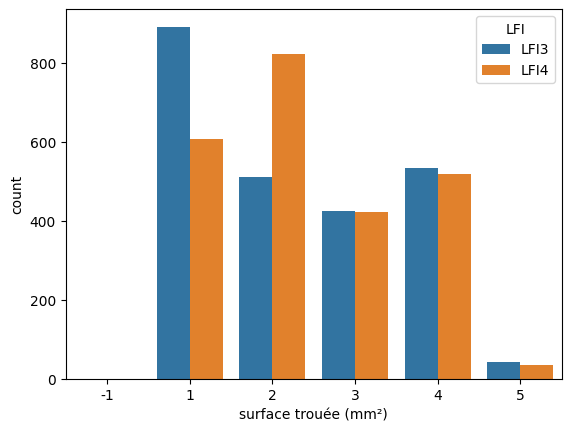

In [29]:
## Surface trouée
# -1	absence de valeur
# 1	pas de trouée (< 100 m2)
# 2	petite trouée (100 à 500 m2)
# 3	trouée moyenne (500 à 1'000 m2)
# 4	grande trouée (1'000 à 5'000 m2)
# 5	très grande trouée (>5'000 m2)

pt = sns.countplot(x="SURF_TROU_AER", data=parcelle, hue="LFI", hue_order=["LFI3", "LFI4"])
pt.set(xlabel='surface trouée (m²)')
plt.show()

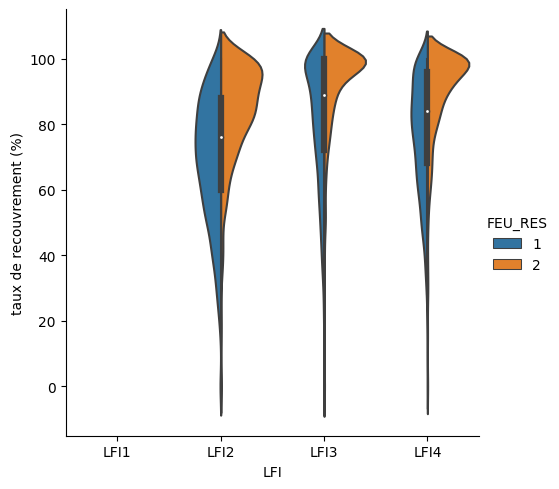

In [53]:
# Taux de recouvrement (%) 25_GRID_PER
pt = sns.catplot(y="25_GRID_PER", data=parcelle, x="LFI", order=["LFI1", "LFI2", "LFI3", "LFI4"], hue="FEU_RES", hue_order= [1, 2], kind="violin", split="FEU_RES")
pt.set(ylabel='taux de recouvrement (%)')
plt.show()

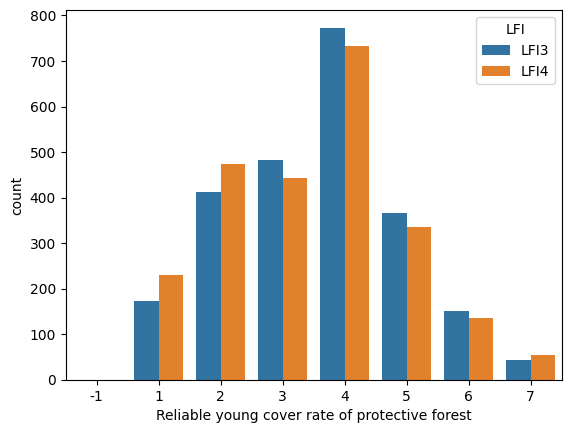

In [4]:
# Taux de couverture assuré par la régénération
# -1 : Valeur non déterminée
# 1 : <1%
# 2 : 1 à 4% de couverture
# 3 : 5 à 9% de couverture
# 4 : 10 à 25%
# 5 : 26 jusqu'à 50%
# 6 : 51 jusqu'à 75%
# 7 : 76 jusqu'à 100%

pt = sns.countplot(x="TAUX_COUV_RAJ_ASS", data=parcelle, hue="LFI", hue_order=["LFI3", "LFI4"])
pt.set(xlabel='Reliable young cover rate of protective forest')
plt.show()

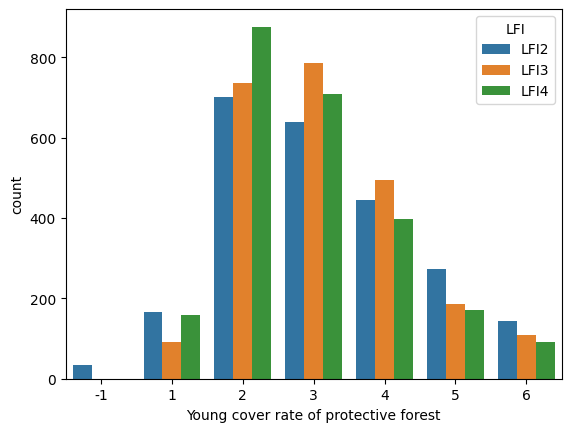

In [7]:
# Taux de couverture de la régénération
# -1 : Valeur non déterminée
# 1 : <1%
# 2 : 1 à 4% de couverture
# 3 : 5 à 9% de couverture
# 4 : 10 à 25%
# 5 : 26 jusqu'à 50%
# 6 : 51 jusqu'à 75%
# 7 : 76 jusqu'à 100%

pt = sns.countplot(x="TAUX_COUV_RAJ", data=parcelle, hue="LFI", hue_order=["LFI2", "LFI3", "LFI4"])
pt.set(xlabel='Young cover rate of protective forest')
plt.show()

In [ ]:
### replotter différemment pour montrer que le devenir des forêts est incertain
pt = sns.countplot(x="TAUX_COUV_RAJ", data=parcelle, hue="LFI", hue_order=["LFI2", "LFI3", "LFI4"])
pt.set(xlabel='Young cover rate of protective forest')
plt.show()

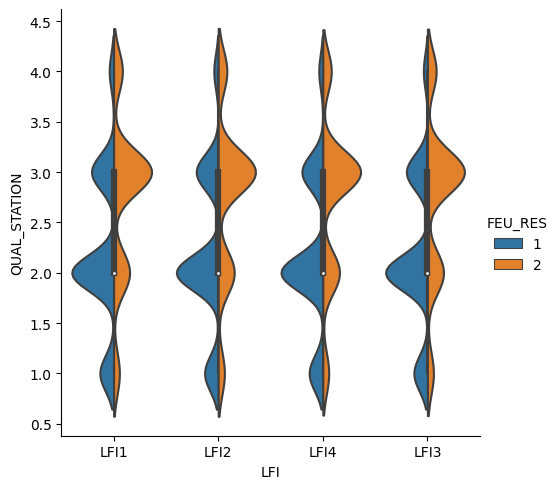

In [15]:
sns.catplot(data=parcelle, x="LFI", y="QUAL_STATION", hue="FEU_RES", hue_order= [1, 2], kind="violin", split=True);

### 2.2 Forest growth

- Surface terriere

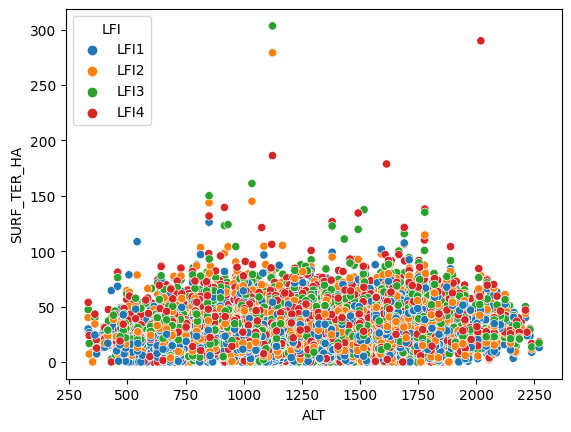

In [16]:
sns.scatterplot(data=parcelle, x="ALT", y="SURF_TER_HA", hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

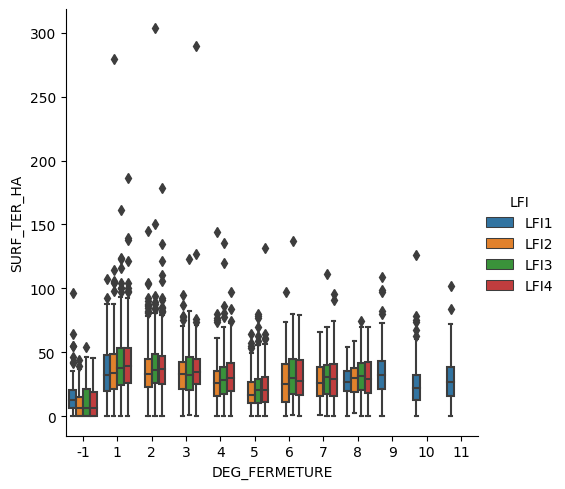

In [17]:
sns.catplot(data=parcelle, x="DEG_FERMETURE", y="SURF_TER_HA", hue="LFI", kind="box", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

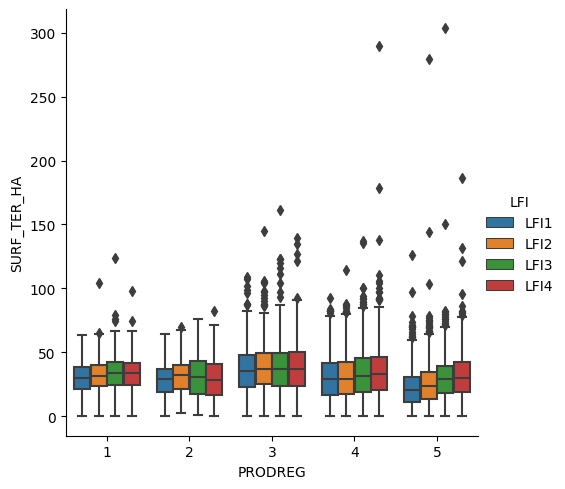

In [18]:
sns.catplot(data=parcelle, x="PRODREG", y="SURF_TER_HA", hue="LFI", kind="box", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

- Performance croissance

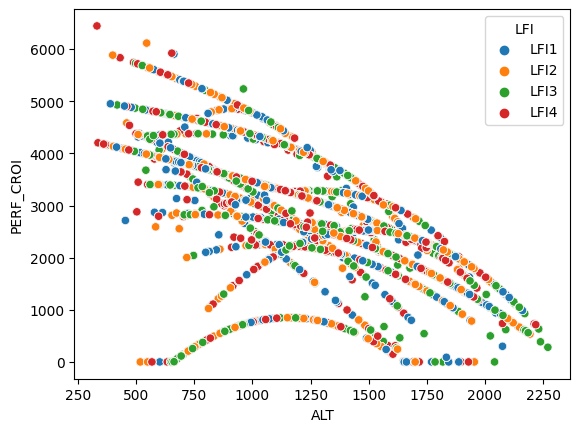

In [19]:
sns.scatterplot(data=parcelle, x="ALT", y="PERF_CROI", hue="LFI", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

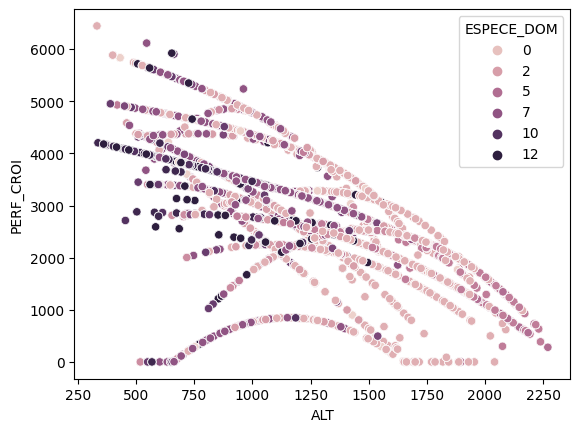

In [20]:
sns.scatterplot(data=parcelle, x="ALT", y="PERF_CROI", hue="ESPECE_DOM");

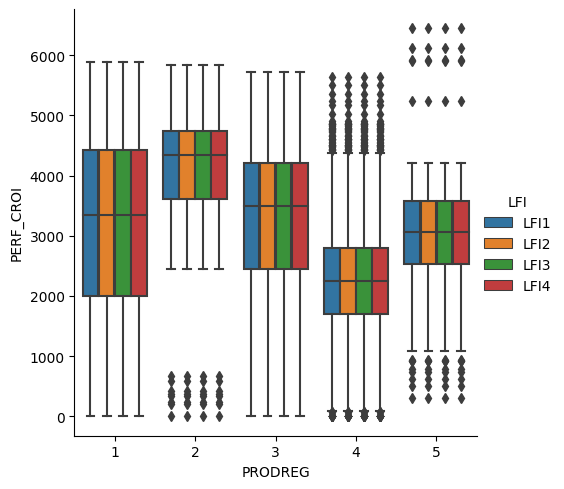

In [21]:
sns.catplot(data=parcelle, x="PRODREG", y="PERF_CROI", hue="LFI", kind="box", hue_order=["LFI1", "LFI2", "LFI3", "LFI4"]);

### 1.3 Correlation matrix

<AxesSubplot: >

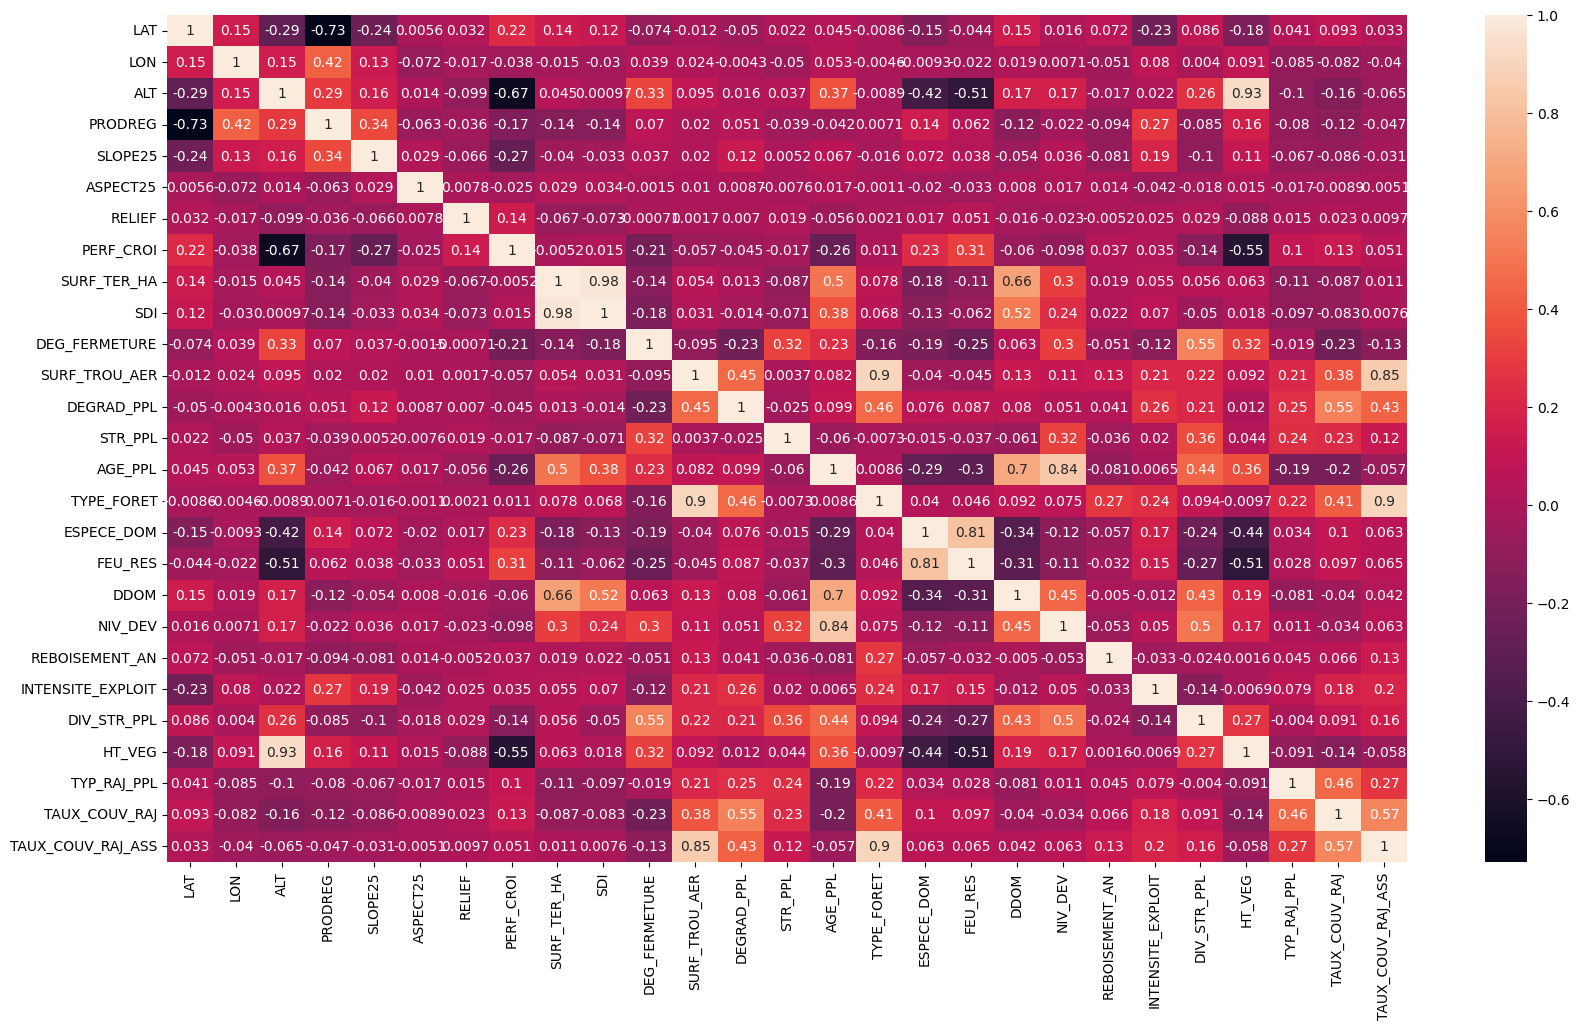

In [22]:
var_to_test = ["LFI", "LAT", "LON", "ALT", "PRODREG", "SLOPE25", "ASPECT25", "RELIEF",
                "PERF_CROI", "SURF_TER_HA", "SDI", "DEG_FERMETURE", "SURF_TROU_AER", "DEGRAD_PPL",
                "STR_PPL", "AGE_PPL", "TYPE_FORET", "ESPECE_DOM", "FEU_RES", "DDOM", "NIV_DEV",
                "REBOISEMENT_AN", "INTENSITE_EXPLOIT", "DIV_STR_PPL", "HT_VEG",
                "TYP_RAJ_PPL", "TAUX_COUV_RAJ", "TAUX_COUV_RAJ_ASS"]

corr = parcelle[var_to_test].corr(method = 'spearman')
f, ax = plt.subplots(figsize=(20, 11))
sns.heatmap(corr, annot=True, ax=ax, fmt='.2g')

1.4 Cartes

In [23]:
fig = px.scatter_mapbox(parcelle, lat="LAT", lon="LON", color="LFI", size="SURF_TER_HA", zoom=6, mapbox_style="carto-positron")
fig.show()

In [24]:
parcelle["DEG_FERMETURE_pos"] = parcelle["DEG_FERMETURE"].apply(lambda x: x if x >= 0
else 0) 

fig = px.scatter_mapbox(parcelle, lat="LAT", lon="LON", color="LFI", size="DEG_FERMETURE_pos", zoom=6, mapbox_style="carto-positron")
fig.show()

In [25]:
fig = px.scatter_mapbox(parcelle, lat="LAT", lon="LON", color="LFI", size="PERF_CROI", zoom=6, mapbox_style="carto-positron")
fig.show()

In [26]:
parcelle["TAUX_COUV_RAJ_ASS_pos"] = parcelle["TAUX_COUV_RAJ_ASS"].apply(lambda x: x if x >= 0
else 0) 

fig = px.scatter_mapbox(parcelle, lat="LAT", lon="LON", color="LFI", size="TAUX_COUV_RAJ_ASS_pos", zoom=6, mapbox_style="carto-positron")
fig.show()